In [74]:
# !pip install tensorflow==2.3.0
# !pip install ta
# !pip install joblib

In [75]:

import pandas as pd
import seaborn as sns
import boto3
import numpy as np
import ta as ta
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

In [76]:
#Cargamos los datos del precio del bitcoin
rawdata=pd.read_csv("BTCUSD/BTC-USD.csv")
rawdf= pd.DataFrame(rawdata)
rawdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-29,17719.634766,18283.628906,17559.117188,18177.484375,18177.484375,3.113396e+10
1,2020-11-30,18178.322266,19749.263672,18178.322266,19625.835938,19625.835938,4.772848e+10
2,2020-12-01,19633.769531,19845.974609,18321.921875,18802.998047,18802.998047,4.963366e+10
3,2020-12-02,18801.744141,19308.330078,18347.718750,19201.091797,19201.091797,3.738770e+10
4,2020-12-03,19205.925781,19566.191406,18925.785156,19445.398438,19445.398438,3.193032e+10


In [77]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       731 non-null    object 
 1   Open       730 non-null    float64
 2   High       730 non-null    float64
 3   Low        730 non-null    float64
 4   Close      730 non-null    float64
 5   Adj Close  730 non-null    float64
 6   Volume     730 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [78]:
rawdf= rawdf.fillna(method="bfill")
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       731 non-null    object 
 1   Open       731 non-null    float64
 2   High       731 non-null    float64
 3   Low        731 non-null    float64
 4   Close      731 non-null    float64
 5   Adj Close  731 non-null    float64
 6   Volume     731 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [79]:

rawdf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
726,2022-11-25,16602.269531,16603.316406,16388.404297,16521.841797,16521.841797,1.867826e+10
727,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,1.800001e+10
728,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,2.044390e+10
729,2022-11-28,16211.814453,16519.802734,16147.228516,16413.421875,16413.421875,2.491266e+10
730,2022-11-29,16211.814453,16519.802734,16147.228516,16413.421875,16413.421875,2.491266e+10


<AxesSubplot:>

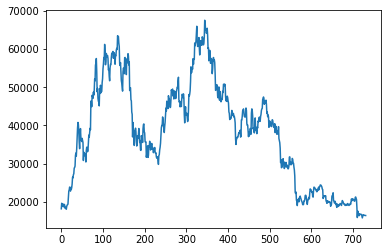

In [80]:
rawdf["Close"].plot()

In [81]:
#Creamos el lookback
df= pd.DataFrame()
df["t"]=rawdf["Close"]
df["t-1"]=rawdf["Close"].shift(1)

df=df.dropna()
df.tail()

,t,t-1
726,16521.841797,16604.464844
727,16464.281250,16521.841797
728,16444.626953,16464.281250
729,16413.421875,16444.626953
730,16413.421875,16413.421875


In [82]:
scaler= MinMaxScaler((-1,1))
df= scaler.fit_transform(df)
df = pd.DataFrame(df)
df.columns= ["t","t-1"]
df

,t,t-1
0,-0.851735,-0.907678
1,-0.883517,-0.851735
2,-0.868141,-0.883517
3,-0.858704,-0.868141
4,-0.887505,-0.858704
...,...,...
725,-0.971627,-0.968436
726,-0.973851,-0.971627
727,-0.974610,-0.973851
728,-0.975815,-0.974610


In [83]:
#separamos datos de etiquetas
Y= df["t"]
X= df["t-1"]


In [84]:



#Separamos los datos de entrenamiento y validacion

Xtrain, Xtest = train_test_split(X, shuffle=False)
Ytrain, Ytest = train_test_split(Y, shuffle=False)


print("Train: {}, Test:{}".format(len(Xtrain),len(Xtest)))

Train: 547, Test:183


In [85]:
#hacemos reshape pues el modelo espera los datos con forma (samples, timesteps, features)
Xtrain= Xtrain.to_numpy()
Ytrain= Ytrain.to_numpy()

Xtrain =np.reshape(Xtrain,(Xtrain.shape[0],1,1))

Ytrain =np.reshape(Ytrain,(Ytrain.shape[0],1,1))
Xtrain.shape

(547, 1, 1)

In [86]:
Xtest= Xtest.to_numpy()
Ytest= Ytest.to_numpy()

Xtest =np.reshape(Xtest,(Xtest.shape[0],1,1))

Ytest =np.reshape(Ytest,(Ytest.shape[0],1,1))
Xtest.shape

(183, 1, 1)

In [87]:
tf.keras.backend.set_image_data_format("channels_last")

In [88]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [89]:
model.fit(Xtrain, Ytrain, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
547/547 - 0s - loss: 0.0939
Epoch 2/100
547/547 - 0s - loss: 0.0147
Epoch 3/100
547/547 - 0s - loss: 0.0050
Epoch 4/100
547/547 - 0s - loss: 0.0050
Epoch 5/100
547/547 - 0s - loss: 0.0049
Epoch 6/100
547/547 - 0s - loss: 0.0050
Epoch 7/100
547/547 - 0s - loss: 0.0050
Epoch 8/100
547/547 - 0s - loss: 0.0049
Epoch 9/100
547/547 - 0s - loss: 0.0049
Epoch 10/100
547/547 - 0s - loss: 0.0048
Epoch 11/100
547/547 - 0s - loss: 0.0048
Epoch 12/100
547/547 - 0s - loss: 0.0048
Epoch 13/100
547/547 - 0s - loss: 0.0047
Epoch 14/100
547/547 - 0s - loss: 0.0048
Epoch 15/100
547/547 - 0s - loss: 0.0048
Epoch 16/100
547/547 - 0s - loss: 0.0048
Epoch 17/100
547/547 - 0s - loss: 0.0048
Epoch 18/100
547/547 - 0s - loss: 0.0047
Epoch 19/100
547/547 - 0s - loss: 0.0047
Epoch 20/100
547/547 - 0s - loss: 0.0048
Epoch 21/100
547/547 - 0s - loss: 0.0047
Epoch 22/100
547/547 - 0s - loss: 0.0047
Epoch 23/100
547/547 - 0s - loss: 0.0047
Epoch 24/100
547/547 - 0s - loss: 0.0047
Epoch 25/100
547/547 - 0s

In [90]:
# hacemos predicciones
predictionsdf= pd.DataFrame()

predictionsdf["Train"] = pd.DataFrame(model.predict(Xtrain))
predictionsdf["Test"]  = pd.DataFrame(model.predict(Xtest))
predictionsdf

,Train,Test
0,-0.889291,-0.397446
1,-0.841344,-0.394867
2,-0.868748,-0.472262
3,-0.855543,-0.446446
4,-0.847390,-0.475907
...,...,...
542,-0.481368,NaN
543,-0.492695,NaN
544,-0.517137,NaN
545,-0.509994,NaN


In [91]:
a= scaler.inverse_transform(predictionsdf)
a= pd.DataFrame(a)
a

,0,1
0,18653.509766,31387.271484
1,19894.861328,31454.031250
2,19185.361328,29450.310547
3,19527.240234,30118.662109
4,19738.330078,29355.945312
...,...,...
542,29214.539062,NaN
543,28921.291016,NaN
544,28288.507812,NaN
545,28473.419922,NaN


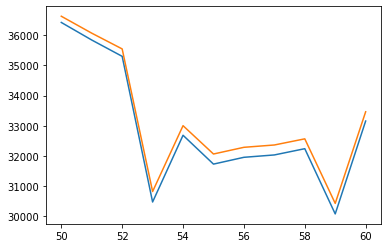

In [92]:
plt.plot(a[0][50:61])
#plt.plot(a[1])
plt.plot(rawdf["Close"][50:61])


In [93]:
testvalues=rawdf["Close"][len(a[0]):len(rawdf)-1]


329.74717817146893

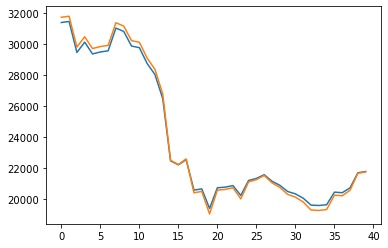

In [94]:
testvalues= testvalues.reset_index()
testvalues=testvalues.drop("index",axis=1)
b= a[1].dropna()
plt.plot(b[:40])
plt.plot(testvalues[:40])
mse(b,testvalues)**0.5

In [95]:
actest= pd.DataFrame()
actest["pred"]=b
actest["val"]=testvalues
actest= actest-actest.shift(1)

In [96]:
actest= actest-actest.shift(1)
actest= actest.dropna()

In [97]:
actest["val"]

2     -2059.150391
3      2661.638672
4     -1431.505859
5       891.621094
6       -54.775392
          ...     
178    -427.179687
179     -76.380860
180      25.062500
181      37.906250
182     -11.550781
Name: val, Length: 181, dtype: float64

In [98]:
actest= actest.dropna()
counter=0
for i in range(len(actest)):
    if actest["pred"][i+2]>0 and actest["val"][i+2]>0:
        counter= counter+1
    if actest["pred"][i+2]<0 and actest["val"][i+2]<0:
        counter= counter+1    
    
print(counter/len(actest))    

1.0


In [99]:

#debido a la naturaleza del problema la validacion cruzada no es aplicable pues los datos pues estamos tratando con una serie de tiempo

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [101]:
def create_model(optimizer='adam',loss='mean_squared_error'):
    tf.keras.backend.set_image_data_format("channels_last")
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer, loss)

    

    return model

In [102]:
# p= KerasRegressor(build_fn=create_model,verbose=0)

In [103]:


# pipelinePreprocessing = Pipeline(
#     [
#         ('Escalado minmax', MinMaxScaler())
#     ]
# )
# column_transformer = ColumnTransformer(
#     [
#         ('Preprocesamiento', pipelinePreprocessing)
#     ]
# )

# lstmpipeline= Pipeline(
#     [
#         ('Preprocesamiento', column_transformer),
#         ('modelo',p)
#     ]
# )



In [104]:
# df= pd.DataFrame()
# df["t"]=rawdf["Close"]
# df["t-1"]=rawdf["Close"].shift(-1)

# df=df.dropna()
# df.head()

In [105]:
# Xtest= df["t-1"].to_numpy()
# Ytest= df["t"].to_numpy()

# Xtest =np.reshape(Xtest,(Xtest.shape[0],1,1))

# Ytest =np.reshape(Ytest,(Ytest.shape[0],1,1))
# Xtest.shape

In [106]:
# lstmpipeline.fit(Xtest,Ytest)

In [107]:
# lr_results = cross_validate(lstmpipeline,df["t-1"],df["t"],
#                         cv=10, return_train_score=True,
#                         scoring=['accuracy', 'f1'])

In [108]:
# results = cross_validate(lstmpipeline,Xtest,Ytest,cv=10, return_train_score=True,scoring=['accuracy', 'f1'])

In [110]:
model.save("lstmbtcpred")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2022-12-11 00:00:47.555150: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: lstmbtcpred/assets


In [113]:
import joblib 
import pickle
import tempfile



s3_resource = boto3.resource('s3')

bucket='datosproyectofinal'
key= 'lstm.joblib'

pickle_byte_obj = joblib.dump(model,key)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)


TypeError: cannot pickle '_thread.RLock' object

In [ ]:
import boto3
from sagemaker import get_execution_role   
# Specify your AWS Region
aws_region='us-east-1'

# Create a low-level SageMaker service client.
sagemaker_client = boto3.client('sagemaker', region_name=aws_region)

# Role to give SageMaker permission to access AWS services.
sagemaker_role= get_execution_role()

In [115]:

from flask import Flask, render_template, request, redirect, url_for
import json


app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    #return "Hello World"
    if request.method == 'POST':
        historico = request.form['historico']
        

        data = {'Historico': historico}

        return redirect(url_for('prediccion', data=json.dumps(data)))

    return render_template('input_form.html')

@app.route('/prediccion<data>')
def prediccion(data):
    # Ruta modelo para la prediccion en Local
    model = joblib.load('lstm.joblib')

    formated_data = json.loads(data)

    data = [float(formated_data.get('Historico'))]

    data_for_endpoint = ",".join(str(x) for x in data)
    data_for_endpoint = bien_data_for_endpoint + "\n" + bien_data_for_endpoint

    print(data)
    print(data_for_endpoint)

    # Predicción con Endpoint SageMaker
    endpoint = 'sagemaker-scikit-learn-2022-11-25-23-15-58-775'
    client = boto3.client('sagemaker-runtime', 'us-east-1')

    response = client.invoke_endpoint(EndpointName=endpoint, Body=data_for_endpoint, ContentType='text/csv')

    #print(response)

    # Devuelve un string con el valor de la predicción, entonces extraemos el segundo caracter que contiene el valor de la predicción y lo convertimos a entero
    prediccion = int(response['Body'].read().decode()[1:2])


    print(prediccion)

    # Predicción con modelo local
    #prediccion = model.predict([data])


   
    respuesta = prediccion

    return respuesta
